# Coursework for PA4611

This notebook contains coursework for PA4611 "Computational Fluid and Phase-Space Flows" at University of Leicester.

This piece of course is the first computational project (following the analytical problems that were the first element of the coursework). It is focussed on phase-space flows, using the examples of pendulums and collisionless N-body simulations of astrophysical systems.

## Rules and guidelines for the coursework

This Jupyter notebook, completed, is all that you need to submit. 

The work must be your own, and you may not source answers from other people or online resources. You may use the course notes, lecture slides, and software documentation or other general information available online (i.e., not specific to these questions).

You may not use generative AI to solve the problems. You can use it to do simple tasks with Python (for example, to generate initial conditions for the pendulum task). If so you must clearly document in this notebook which steps were done with the help of AI and which were done by you.

The mark for each question will be based on whether the solutions are correct, whether the plots are clear and well-labelled, whether the code runs correctly and is not unnecessarily repetitive, and whether requested text answers are complete, correct and well reasoned.

The below notebook cells include some basic code which you should use as a starting point, but you will fill in the rest yourself. Also answer any questions in the text box (i.e., markdown cell) they are asked in. Feel free to add extra cells at any point in the notebook if needed.

The notebook you hand in should do all its calculations and plotting when run from start to finish. It should not rely on any external files or data. Check that this is the case before submitting ("Restart and Run All" in Jupyter should help you check this).

## Mark scheme

There are a total of 5 separate tasks in this coursework. There are a total of 100 marks, broken down as follows:

* Task 1 is worth 30 marks
* Task 2 is worth 10 marks
* Tasks 3-5 are each worth 20 marks

For each task (except task 3), 60% of the marks are for completing the task correctly with some leeway for minor errors, and partial marks for partially correct answers. 10% are for the clarity and quality of the plots, 10% for the clarity and quality of the code, and 20% for the text answers.

Task 3 is weighted towards text answers, so 60% of the marks are for the text answers, 20% for the numerical results and again 10% each for the clarity of the plots and code.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
# import scienceplots
# plt.style.use(['science', 'notebook', 'grid'])


## Pendulums

First we will consider the simple case of a pendulum of unit mass and length, under Earth's gravitational field. This is a problem that we have already looked at in Workshops, and you are allowed to reuse your code from that workshop here.



#### Use a numerical integrator to solve for the pendulum's motion

In Workshop 3 you followed the motion of the pendulum using scipy's integrate library (specifically the odeint function). You can repeat that for the next two tasks.

### Task 1: Follow the motion of a box in phase-space. 

In workshop 3 we followed the evolution of a box in phase space for the pendulum. We found that the box rotated and distorted in phase-space over time, such that we could no longer accurately compute the area of the box using only its 4 corners.

In this task you will more carefully follow the evolution of the box in phase-space. The specific tasks are

* (Re)-write code that follows the evolution of a phase-space point in the pendulum system.
* Define a box in phase-space, and place points along its sides.
* Integrate the evolution of these phase-space points for 6 time units using the scipy odeint function
* Plot example 'boxes' at selected times during the evolution.
* Determine the area as a function of time for the box, varying the number of points along each side of the initial box.


First, create a function that gives the phase-space derivative of the pendulum, given the current state of the pendulum. This function should take the current state of the pendulum (position and velocity) and return the derivative of the state (velocity and acceleration).

Note that you must use the full equation of motion of the pendulum that holds for all angles (i.e., does not depend on the small angle approximation).


In [58]:
g=9.81
phase_space_point = np.array([0.05, 0])
amplitude = 0.05
def time_derivative_pendulum(phase_space_point, time):

    angle = phase_space_point[0]
    momentum = phase_space_point[1]
    angle_derivative = momentum # because m & l are 1
    momentum_derivative = -g * np.sin(angle) # because m & l are 1 and small angle approximation
    return [angle_derivative, momentum_derivative]

    


Next, create a set of points that runs (sequentially) around the sides of a box $1\leq \theta \leq1.2$, $1\leq p_\theta\leq 1.2$. Some of the needed code is supplied below, but you will need to complete it.

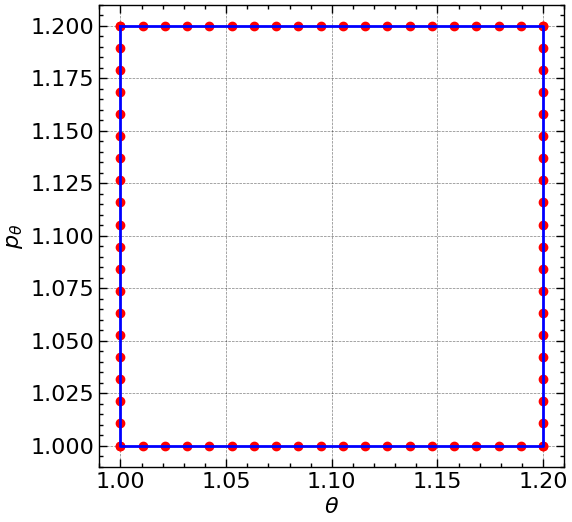

In [59]:
# the four sides of a square in phase space

n_per_side = 20
x_top = np.linspace(1,1.2,n_per_side) 
# values of x running along the top of the box
y_top = np.ones(n_per_side) + 0.2 
# values of y running along the top of the box. This is 1.2 for all points, 
# and is created by making a set of points of value 1 (using the function np.ones), and adding 0.2 to all values
x_right = np.ones(n_per_side)+0.2 # values of x running along the right side of the box
# fill in the equivalents for x & y around the rest of the box
y_right = np.linspace(1.2, 1, n_per_side)
x_left = np.ones(n_per_side) # values of x running along the left side
y_left = np.linspace(1, 1.2, n_per_side)

x_bottom = np.linspace(1.2, 1, n_per_side)
y_bottom = np.ones(n_per_side)
# I will tell you that you need x_bottom = np.linspace(1.2,1,n_per_side), rather than (1,1.2,...) so the values of x run from 1.2 to 1

# Put them all together to makeGroguscotchy the initial phase space square
x_full = np.concatenate([x_top, x_right, x_bottom, x_left])
y_full = np.concatenate([y_top, y_right, y_bottom, y_left])
initial_phase_space_square = np.stack([x_full, y_full], axis=1)

plt.figure(figsize=(6,6))
plt.plot(x_full, y_full, 'b-', lw=2)
plt.scatter(x_full, y_full, color='red')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p_{\theta}$")
# plt.title("Initial Phase-Space Square")
plt.grid(True)
plt.show()

Integrate the equations of motion forwards by 6 time units, and plot some of the boxes at different times. 


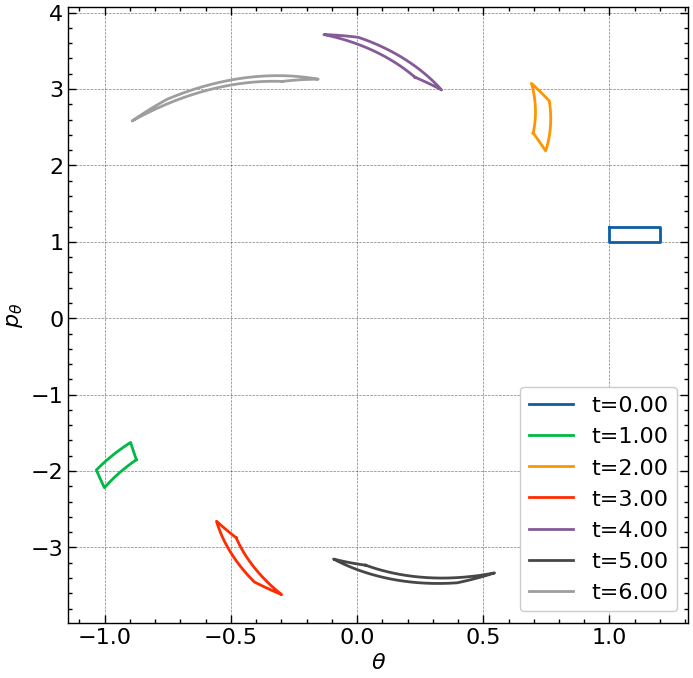

In [60]:
# Integrate here, and plot results
t_numerical = np.linspace(0, 6, 61) # The values of t at which I want the integrator to give me results

all_output = np.zeros((len(initial_phase_space_square), len(t_numerical), 2))
for i in range(len(initial_phase_space_square)):
    results = integrate.odeint(time_derivative_pendulum, y0=initial_phase_space_square[i], t=t_numerical)
    all_output[i] = results

time_plot = [0, 10, 20, 30, 40, 50, 60]

plt.figure(figsize=(8, 8))
for tp in time_plot:
    plt.plot(all_output[:, tp, 0], all_output[:, tp, 1], label=f't={t_numerical[tp]:.2f}')

plt.xlabel(r'$\theta$')
plt.ylabel(r'$p_\theta$')
plt.legend()
plt.grid(True)
plt.show()


Now you should have code that will follow the evolution of the system using any number of particles along the sides to trace the outline of the phase-space area.

Now, you should calculate the area of the box as a function of time and plot it. You should do this for 5 points per side, then for double the number of points, then double again and so on until the results converge (i.e., do not change significantly when the number of points is doubled)

**Some advice:**  
You will save some time for yourself if you create a function that takes as input the starting coordinates of the box and number of points per side, and returns the output of the numerical integration. This will allow you to easily change the number of points per side and re-run the calculation.

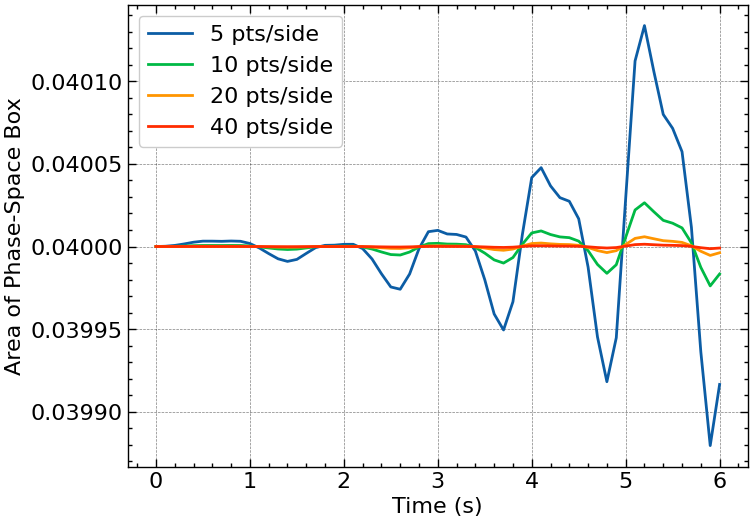

In [106]:
def PolyArea(x,y):
    '''A function that calculates the area of a polygon given the x and y coordinates of its vertices'''
    # Thanks to the writer of the top answer here: 
    # https://stackoverflow.com/questions/24467972/calculate-area-of-polygon-given-x-y-coordinates
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))


# In this cell you should create a figure showing area (y-axis) as a function of time (x-axis) for the 
# different values (separate lines, labelled) of the initial phase space points per side of the square.

def box(n_per_side, t_numerical, coordinates):

    x_top = np.linspace(coord[0],coord[1],n_per_side) 
    # values of x running along the top of the box
    y_top = np.ones(n_per_side) + 0.2 
    # values of y running along the top of the box. This is coord[] for all points, 
    # and is created by making a set of points of value 1 (using the function np.ones), and adding 0.2 to all values
    x_right = np.ones(n_per_side)+0.2 # values of x running along the right side of the box
    # fill in the equivalents for x & y around the rest of the box
    y_right = np.linspace(coord[3], coord[2], n_per_side)
    x_left = np.ones(n_per_side) # values of x running along the left side
    y_left = np.linspace(coord[2], coord[3], n_per_side)
    
    x_bottom = np.linspace(coord[1], coord[0], n_per_side)
    y_bottom = np.ones(n_per_side)
    # I will tell you that you need x_bottom = np.linspace(1.2,1,n_per_side), rather than (1,1.2,...) so the values of x run from 1.2 to 1
    
    # Put them all together to make the initial phase space square
    x_full = np.concatenate([x_top, x_right, x_bottom, x_left])
    y_full = np.concatenate([y_top, y_right, y_bottom, y_left])
    initial_phase_space_square = np.stack([x_full, y_full], axis=1)

    all_output = np.zeros((len(initial_phase_space_square), len(t_numerical), 2))
    for i in range(len(initial_phase_space_square)):
        results = integrate.odeint(time_derivative_pendulum, y0=initial_phase_space_square[i], t=t_numerical)
        all_output[i] = results
    return all_output, initial_phase_space_square

sides = [5, 10, 20, 40]
coord = [1, 1.2, 1, 1.2]
areas = np.zeros_like(t_numerical)
t_numerical = np.linspace(0, 6, 61)

for n_points in sides:
    all_output, initial_square = box(n_points, t_numerical, coord)
    
    areas = []
    for j in range(len(t_numerical)):
        theta = all_output[:, j, 0]
        momentum = all_output[:, j, 1]
        areas.append(PolyArea(theta, momentum))
    areas = np.array(areas)
    
    plt.plot(t_numerical, areas, label=f'{n_points} pts/side')
plt.xlabel('Time (s)')
plt.ylabel('Area of Phase-Space Box')
plt.legend()
plt.grid(True)
plt.show()



#### Question:

Given the results above, what can you say about the properties of the integration method used by scipy's odeint function?

$\color{blue}{\text{[Give your answer here]}}$

### Task 2: A different area of phase-space for the pendulum problem

Using the same methods as in task 1, follow the evolution of a phase-space box for the pendulum where the initial square of phase-space points is defined by $-0.1<\theta<0.1$, $6.2<p_\theta<6.4$. This will behave qualitatively differently from the previous case.

Follow the evolution for the same span of time as in Task 1. Plot the points at different times to demonstrate the evolution of the system particularly around $t\approx1$ when the system is at its most interesting. (*Hint* do not try to connect the points with lines, just plot them as points).

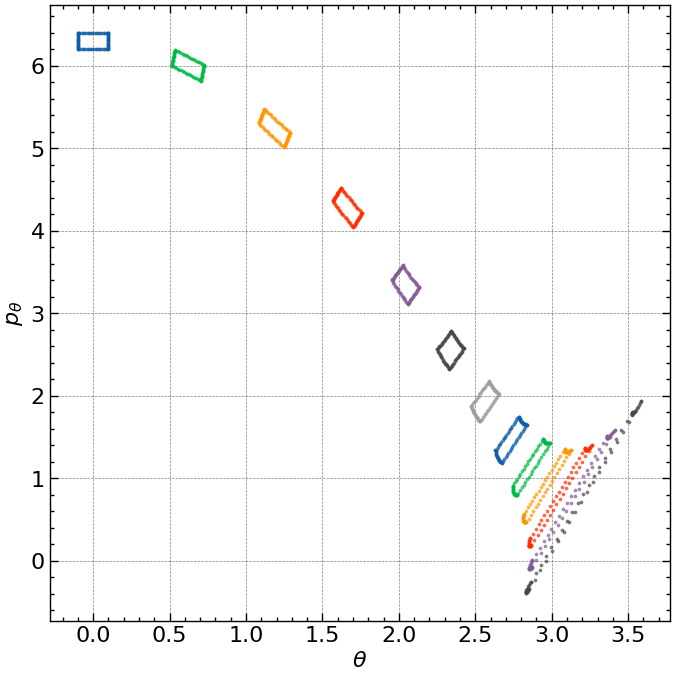

In [110]:
###  One helpful code snippet, which you can use to ensure that theta is between -pi and pi is:
# angle_out = np.mod(angle_out[:,:,0], 2*np.pi) # sets the angle between 0 and 2 pi
# angle_out[:,:,0][angle_out[:,:,0]> np.pi] -= 2*np.pi # sets the angle between -pi and pi

# Define the new initial phase-space box with different range
n_per_side = 20

# x_top = np.linspace(-0.1, 0.1, n_per_side)
# y_top = np.ones(n_per_side) * 6.4

# x_right = np.ones(n_per_side) * 0.1
# y_right = np.linspace(6.4, 6.2, n_per_side)

# x_left = np.ones(n_per_side) * -0.1
# y_left = np.linspace(6.2, 6.4, n_per_side)

# x_bottom = np.linspace(0.1, -0.1, n_per_side)
# y_bottom = np.ones(n_per_side) * 6.2

# # Combine all points to form the new phase-space square
# x_full = np.concatenate([x_top, x_right, x_bottom, x_left])
# y_full = np.concatenate([y_top, y_right, y_bottom, y_left])
# initial_phase_space_square = np.stack([x_full, y_full], axis=1)

coord2 = [-.1, .1, 6.2, 6.4]
box(n_per_side, t_numerical, coord2)
t_numerical = np.linspace(0, 6, 61) # The values of t at which I want the integrator to give me results

all_output = np.zeros((len(initial_phase_space_square), len(t_numerical), 2))
for i in range(len(initial_phase_space_square)):
    results = integrate.odeint(time_derivative_pendulum, y0=initial_phase_space_square[i], t=t_numerical)
    all_output[i] = results

time_plot = np.arange(0, 13, 1)


plt.figure(figsize=(8, 8))
for tp in time_plot:
    plt.scatter(all_output[:, tp, 0], all_output[:, tp, 1], label=f't={t_numerical[tp]:.2f}', s=3, alpha = 0.6)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p_\theta$')
# plt.legend()
plt.grid(True)
plt.show()

#### Question:

Explain physically why the set of phase-space points do not stay together as a coherent box in this case. What is the pendulum doing (physically, i.e. what would you see if you were looking at these individual pendulums) in the two different cases you have found?

$\color{blue}{\text{[Give your answer here]}}$

## Galactic dynamics

### Task 3: Jeans equations

This task is somewhat less computational than the others, but is a good test of your understanding of the material. We will be applying what you have learned about Jeans equations to the estimation of the dark matter density near the Sun.

In 2012, a paper (that I will be polite enough not to cite) suggested that there was a lack of dark matter in the Solar neighbourhood. This got a significant amount of press attention, and even an article in New Scientist. It was based on measurements of the velocity dispersion of stars in the higher-up parts of the Milky Way disc, and use of Jeans equations to use these to estimate a mass density profile in the Solar neighbourhood.

The paper was wrong. The statistical analysis used to find the velocity dispersions was wrong, and the Jeans equations were applied with unreasonable assumptions. We can, however, use this as a learning exercise in the Jeans equations.

#### Question
In lectures we saw that the collisionless Boltzmann equation can be written in cylindrical polar coordinates as 

$$ \frac{\partial f}{\partial t} + p_R \frac{\partial f}{\partial R} + p_z \frac{\partial f}{\partial z} + \frac{p_\phi}{R^2} \frac{\partial f}{\partial \phi} - \left(\frac{\partial \Phi}{\partial R} - \frac{p_\phi^2}{R^3}\right) \frac{\partial f}{\partial p_R} - \frac{\partial \Phi}{\partial z} \frac{\partial f}{\partial p_z} = 0 $$

where $f$ is the distribution function, $\Phi(R,z)$ is the gravitational potential which is axisymmetric, and $v_R$, $v_z$, and $v_\phi$ are the velocity components in the radial, vertical, and azimuthal directions respectively.

Explain mathematically how we can derive this equation from the collisionless Boltzmann equation in the form

$$ \frac{\partial f}{\partial t} + \frac{\partial f}{\partial \mathbf{q}} \cdot \dot{\mathbf{q}} +  \frac{\partial f}{\partial \mathbf{p}} \cdot \dot{\mathbf{p}} = 0 $$

It is best to explain this term-by-term rather than in one big equation.

$\color{blue}{\text{[Give your answer here]}}$


**Answer:**

For an axisymmetric system, the total energy is defined as:


$$\mathcal{H} + \frac{1}{2m}\left(p_R^2 + p_z^2 + \frac{p_{\phi}^2}{R^2} \right) + m \Phi(R, z)$$

Hamilton's equations are given by:

$$ \dot{q} = \frac{\partial \mathcal{H}}{\partial \textbf{p}}  $$  
$$ \dot{p} = -\frac{\partial \mathcal{H}}{\partial \textbf{q}} $$

For coordinate points:

$$\dot{R} = \frac{\partial \mathcal{H}}{\partial p_R} = \frac{p_R}{m}$$
$$\dot{z} = \frac{\partial \mathcal{H}}{\partial p_z} = \frac{p_z}{m}$$
$$\dot{\phi} = \frac{\partial \mathcal{H}}{\partial p_{\phi}} = \frac{p_{\phi}}{mR^2}$$

For momenta's:

$$\dot{p_R} = -\frac{\partial \mathcal{H}}{\partial R} = -\frac{\partial}{\partial R}\left[\frac{1}{2m}\left(p_R^2 + p_z^2 + \frac{p_{\phi}^2}{R^2}\right) + m \Phi(R, z) \right] = \frac{p_\phi^2}{R^3} - m\frac{\partial \phi}{\partial R}$$

$$\dot{p_z} -\frac{\partial \mathcal{H}}{\partial z} = -m\frac{\partial \phi}{\partial z}$$
$$\dot{p_\phi} -\frac{\partial \mathcal{H}}{\partial \phi} = 0$$

Subbing all the values in the given collisionless Boltzmann equation:

$$\frac{\partial f}{\partial t} + \left(\frac{\partial f}{\partial R}\dot{R} + \frac{\partial f}{\partial \phi}\dot{\phi} + \frac{\partial f}{\partial z}\dot{z}  \right) +  \left( \frac{\partial f}{\partial p_R} \dot{p_R} + \frac{\partial f}{\partial p_\phi} \dot{p_\phi} + \frac{\partial f}{\partial p_z} \dot{p_z}\right) = 0$$

$$ \frac{\partial f}{\partial t} + \left(\frac{\partial f}{\partial R} p_r + \frac{\partial f}{\partial \phi}\frac{p_\phi}{R^2} + \frac{\partial f}{\partial z}p_z  \right) +  \left[ \left(-\frac{\partial \phi}{\partial R} + \frac{p_\phi^2}{R^3}\right)\frac{\partial f}{\partial p_R} + 0 -\frac{\partial \phi}{\partial z} \frac{\partial f}{\partial p_z} \right] = 0$$

which is the collisionless Boltzmann equation in cyclindrical polar coordinates.

#### Question
The critical assumption in the paper was that the average azimuthal velocity of stars in the Milky Way is constant with radius. A far more accurate assumption is that the circular velocity (given by $v_c = \sqrt{R \frac{\partial \Phi}{\partial R}}$) is constant with radius.

Explain why these assumptions are different from one another. You may quote Jeans equations without deriving them.

$\color{blue}{\text{Answer here}}$


#### Question

Writing the gravitational force in the $R$ and $z$ directions as $F_R$ and $F_z$ respectively, the Poisson equation for the gravitational potential tells us that

$$\Sigma(R,z) = \frac{-1}{2\pi G} \left( F_z + \int_0^z \frac{1}{R} \frac{\partial R F_R}{\partial R} dz \right)$$

where $\Sigma(R,z) = \int_{-z}^z \rho(R,z) dz$ is the surface density of the mass distribution up to a height z.

Explain why, if we assume that the circular velocity is constant with radius, the integral term in this equation is zero.

$\color{blue}{\text{[Give your answer here]}}$

With this assumption, we are left with the equation $\Sigma(R,z) = \frac{-F_z}{2\pi G}$. Using the vertical component of Jeans equation in the form:

$$ F_z = -\frac{\partial \Phi}{\partial z} = \frac{1}{Rn} \frac{\partial (R n \sigma_{Rz}^2)}{\partial R} + \frac{1}{n} \frac{\partial n\sigma_z^2}{\partial z}$$

we can calculate $F_z$ and therefore $\Sigma(R,z)$. We assume that the number density follows an exponential profile, $n(R,z) = n_0 \exp(-R/R_s - |z|/z_s)$, and that $\sigma_{Rz}^2$ varies with radius like $\sigma_{Rz}^2 = \sigma_{Rz,0}^2 (-R/R_\sigma)$. The values $R_s, z_s$ and $R_\sigma$ are constants.

Using product rule to differentiate the expression for $F_z$, you should be able to find a expression that depends only on the values given below. Hence find $F_z(R_0,z)$ (this will be in units km  $^2$ s $^{-2}$ kpc $^{-1}$), where $R_0$ is the distance from the Galactic Centre to the Sun, and also the radius at which all of the observed values are taken.

The values you will need are:

$R_0 = 8.$ kpc  
$R_s=3.8$ kpc   
$R_\sigma = 3.8$ kpc  
$z_s = 0.9$ kpc  

$\sigma_z = 40 + 2.7(|z|/\text{kpc} -2.5)$ km s $^{-1}$   Note that the force will depend on $\sigma_z^2$  
$\sigma^2_{Rz,0} = 1500 + 360(|z|/\text{kpc} -2.5)$ km $^2$ s $^{-2}$

These are also given as constants and functions in the code below.

$\color{blue}{\text{[Give equation you derive here]}}$

Plot $F_z$ as a function of $z$ for $1<z<4$ kpc.

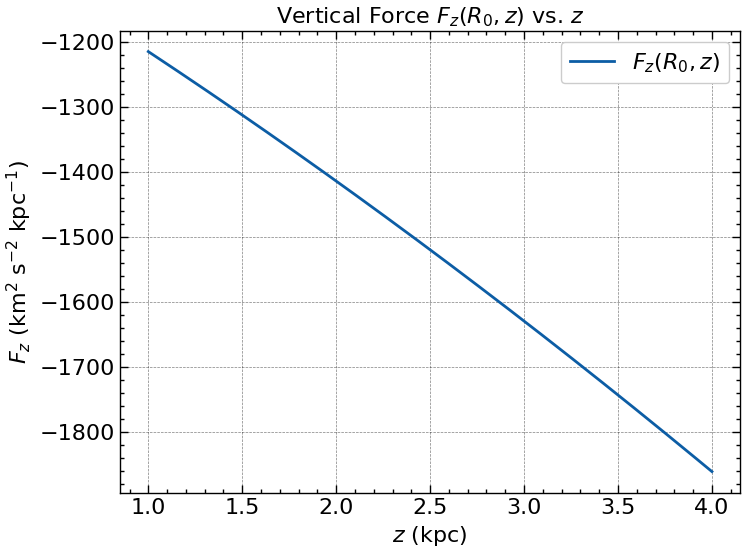

In [ ]:
R_0, R_s, R_sigma, z_s = 8, 3.8, 3.8, 0.9 # constants in kpc as given above

def sigma_z(z):
    '''The vertical velocity dispersion as a function of z'''
    sig_z = 40 + 2.7*(np.abs(z)-2.5)
    return sig_z
def sigma_z2(z):
    '''The vertical velocity dispersion squared as a function of z'''
    return (sigma_z(z))**2

def dsigma_z2_dz(z):
    '''The derivative of the vertical velocity dispersion squared with respect to z'''
    sig_z = sigma_z(z)
    return 2 * sig_z * 2.7 * np.sign(z)

def sigma_Rz2(z):
    '''the R-z component of the velocity dispersion squared'''
    return 1500 + 360 * (np.abs(z)-2.5)

def F_z(z):
    full_term = - sigma_Rz2(z)/R_sigma * (2 - R_0/R_s) + dsigma_z2_dz(z) - sigma_z2(z)/z_s
    return full_term

z_values = np.linspace(1, 4, 400)
F_z_values = F_z(z_values)
plt.figure(figsize=(8, 6))
plt.plot(z_values, F_z_values, label=r'$F_z(R_0,z)$')
plt.xlabel(r'$z$ (kpc)')
plt.ylabel(r'$F_z$ (km$^2$ s$^{-2}$ kpc$^{-1}$)')
plt.grid(True)
plt.legend()




To convert this to the surface density (i.e. multiply by a factor of $-1/(2\pi G)$, and convert to solar masses per square parsec), you must simply multiply it by a factor of $-27$. 

Therefore, plot $\Sigma(R_0,z)$ as a function of $z$ for $1<z<4$ kpc, and compare to the surface density of the visible matter in the Milky Way disc, which is around 60 solar masses per square parsec. Is the Milky Way disc in the Solar Neighbourhood really lacking dark matter?

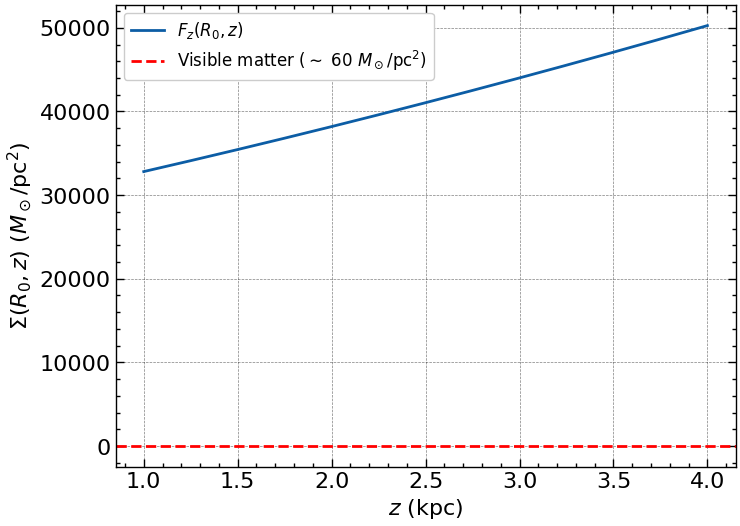

In [125]:
def Sigma_Rz(F_z):
    return F_z * -27

Sigma_R_z_values = Sigma_Rz(F_z_values)

plt.figure(figsize=(8, 6))
plt.plot(z_values, Sigma_R_z_values, label=r'$F_z(R_0,z)$')
plt.axhline(60, color = 'r', ls = '--', label='Visible matter ($\sim$ 60 $M_\odot$/pc$^2$)')
plt.xlabel(r'$z$ (kpc)')
plt.ylabel(r'$\Sigma(R_0,z)$ ($M_\odot$/pc$^2$)')
plt.grid(True)
plt.legend(prop = {'size':12})



### Task 4: Integrating orbits in a gravitational potential

You will now look at the properties of four different orbit integrators:
1. The Modified Euler method
2. The 2nd order Runge-Kutta method
3. The leapfrog method
4. The 4th order Runge-Kutta method

You will apply these to the orbit of a test particle in a fixed gravitational potential, the logarithmic potential

$$ \Phi = \ln(r) + const $$

where $r$ is the distance from the origin. The acceleration of the test particle is then

$$ \mathbf{a} = -\frac{1}{r^2} \mathbf{r} $$

where $\mathbf{r}$ is the position vector of the test particle, so that the magnitude of the acceleration is $1/r$, directed towards the origin.

I will set up the gravitational potential and force, and the initial conditions for you, which should result in an orbit that has a maximum $r=2$, a minimum $r$ around 0.93, and a period of around 6.6 time units.

Your tasks are
* Write functions that implement each of the integrators (these must be entirely your own work, i.e. calling a scipy integrator to do the integration will not earn you any marks)
* Integrate the orbit for 300 time units 
    * Your timestep should be 0.02 time units per evaluation of the acceleration (i.e., 0.02 for integrators 1 & 3; 0.04 for integrator 2 and 0.08 for integrator 4)
    * You should store the position, velocity and energy (per unit mass) of the test particle at each timestep
* Plot the absolute change in energy of the test particle as a function of time for each integrator
    * It is a good idea to check that the orbit looks okay for each integrator before doing this, just for yourself to make sure that the integrator is working correctly.
    * When plotting the difference in energy, you should plot the absolute value of the difference in energy, and use logarithmic spacing on the y-axis (example code given below).


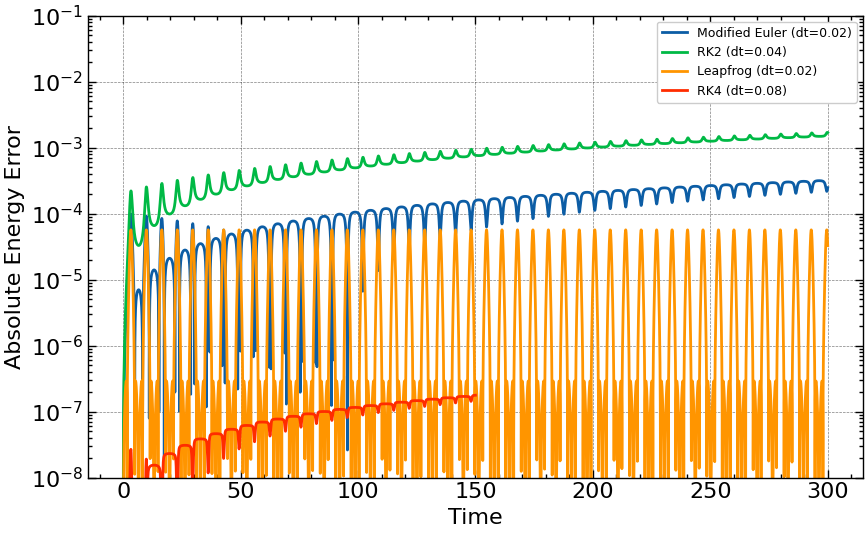

In [141]:
def GravPot(pos):
    '''A function that calculates the gravitational potential due to a logarithmic potential'''
    r = np.sqrt(pos[0]**2 + pos[1]**2 + pos[2]**2)
    pot = np.log(r) # Can add an arbitrary constant here, but it will cancel out when calculating the force or 
    return pot

def GravForce(pos):
    '''A function that calculates the gravitational force (in component form) due to a logarithmic potential'''
    r = np.sqrt(pos[0]**2 + pos[1]**2 + pos[2]**2)
    force = -pos/r**2 
    return force


r0, v0 = 2., 0.65
w0 = np.array([r0, 0, 0, 0, v0, 0]) # initial conditions - at radius r0 with velocity v0 in the direction of rotation


tmax = 300
dtME = 0.02  # time step for the Modified Euler integrator and leapfrog integrator
dtRK2 = 0.04
dtRK4 = 0.08
nstepsME = int(tmax/dtME) # number of steps for the Modified Euler integrator (also for leapfrog integrator)
nstepsRK2 = int(tmax/dtRK2) # number of steps for the Modified Euler integrator
nstepsRK4 = int(tmax/dtRK4) # number of steps for the Modified

# When plotting the energy, you are in all cases subtracting the initial energy from the energy at 
# each time step, and then taking the absolute value. So, for example, with initial energy E0, and 
# energy at all timesteps for the Modified Euler integrator stored in the numpy array E_ME,
# you would plot np.abs(E_ME - E0) on the y-axis against time on the x-axis.

# You would then set the y-axis to be on a log scale using plt.yscale('log').

# You will probably want to adjust the range of values on the y-axis, because some values
# will be very close to zero, and so will not be visible on a log scale. 
# You can do this using e.g., plt.ylim([1e-8, 1e-1]).

pos = w0[0:3]
vel = w0[3:6]

def f(w):
    pos = w[0:3]
    vel = w[3:6]
    accel = GravForce(pos)
    return np.concatenate([vel, accel])

def EulerMethod(w, dt):
     w_predicted = w + dt*f(w)
     w_corrected = w + dt/2 * (f(w) + f(w_predicted))
     return w_corrected

def rk2(w, dt):
    k1 = f(w)
    w_mid = w + dt/2 * k1
    k2 = f(w_mid)
    return w + dt * k2

def leapfrog(w, dt):
    pos = w[0:3].copy()
    vel = w[3:6].copy()
    vel_half = vel + (dt/2) * GravForce(pos)
    pos_new = pos + dt * vel_half
    acc_new = GravForce(pos_new)
    vel_new = vel_half + (dt/2) * acc_new
    return np.concatenate([pos_new, vel_new])

def rk4(w, dt):
    k1 = f(w)
    k2 = f(w + dt/2 * k1)
    k3 = f(w + dt/2 * k2)
    k4 = f(w + dt * k3)
    return w + dt/6 * (k1 + 2*k2 + 2*k3 + k4)   

def integrate_orbit(integrator, dt, tmax, w0, nsteps):
    times = np.zeros(nsteps+1)
    energies = np.zeros(nsteps+1)
    w = w0.copy()
    pos = w[0:3]
    vel = w[3:6]
    energies[0] = 0.5*np.dot(vel, vel) + GravPot(pos)
    states = [w.copy()]
    for i in range(nsteps):
        w = integrator(w, dt)
        states.append(w.copy())
        times[i+1] = times[i] + dt
        pos = w[0:3]
        vel = w[3:6]
        energies[i+1] = 0.5*np.dot(vel, vel) + GravPot(pos)
    return times, energies, np.array(states)

times_ME, energies_ME, states_ME = integrate_orbit(EulerMethod, dtME, tmax, w0, nstepsME)
times_rk2, energies_rk2, states_rk2 = integrate_orbit(rk2, dtRK2, tmax, w0, nstepsRK2)
times_leap, energies_leap, states_leap = integrate_orbit(leapfrog, dtME, tmax, w0, nstepsME)
times_rk4, energies_rk4, states_rk4 = integrate_orbit(rk4, dtRK2, tmax, w0, nstepsRK4)

energy_error_ME   = np.abs(energies_ME - energies_ME[0])
energy_error_RK2 = np.abs(energies_rk2  - energies_rk2[0])
energy_error_leapfrog = np.abs(energies_leap - energies_leap[0])
energy_error_RK4 = np.abs(energies_rk4 - energies_rk4[0])

plt.figure(figsize=(10,6))
plt.plot(times_ME, energy_error_ME, label='Modified Euler (dt=0.02)')
plt.plot(times_rk2, energy_error_RK2, label='RK2 (dt=0.04)')
plt.plot(times_leap, energy_error_leapfrog, label='Leapfrog (dt=0.02)')
plt.plot(times_rk4, energy_error_RK4, label='RK4 (dt=0.08)')

plt.xlabel('Time')
plt.ylabel('Absolute Energy Error')
plt.yscale('log')
plt.ylim([1e-8, 1e-1])
plt.legend(prop = {'size':9})
plt.grid(True)




#### Question:

Using what you know about these intergrating methods, explain the behaviour seen in your plots of energy difference as a function of time.

$\color{blue}{\text{[Give your answer here]}}$

### Task 5: The first N-body simulations

In 1941, while the rest of the world was rather busy with other things, a Swedish astrophysicist called Erik Holmberg performed the first N-body simulation of a galaxy. He did it using lightbulbs and a photometer to measure the gravitational force from each lightbulb on the others to demonstrate the effect that encounters between "extragalactic nebulae" (i.e., galaxies) could have on one another.

Now, using the major advances in computational technology that have occurred since 1941, you will recreate his simulation without needing to measure the light intensity from a lightbulb even once. It should mean that your calculations are more speedy than his.

I will give you code that sets up the initial conditions for the simulation, and you will need to write the code that integrates the orbits of the particles in the simulation. I will give guidance along the way.

Your main tasks are to:
* Write a function that calculates the acceleration of each particle in the simulation, assuming that the gravitational force for each particle is smoothed.
* Use this function and a leapfrog integrator that you write to integrate the orbits of the particles in the simulation for 15 time units.

Important note:  
Throughout this we are assuming that $G=1$ in the unit system used. If we want to apply this to real systems, then we would need to convert the units to physical units. That is not necessary for this task.

In [75]:

def CreateGalaxy():
    '''A function that creates the initial conditions for a galaxy
    
    The galaxy is made up of 37 particles, with the central particle at the origin, and the rest in 4 rings around it.
    The particles have different masses and, initially, are moving on almost circular orbits
    
    The galaxy is given out in a numpy array, of shape [37,7], 
    with each row corresponding to a particle, and the columns corresponding to:
    x, y, z, vx, vy, vz, mass
    '''
    n_particles_per_galaxy = 37
    galaxy = np.zeros([n_particles_per_galaxy, 7])
    galaxy[0] = [0, 0, 0, 0, 0, 0, 1] # central particle
    phi_tmp = np.linspace(0, 2*np.pi, 6, endpoint=False)
    v_tmp = 1.04
    galaxy[1:7] = np.stack([np.cos(phi_tmp), np.sin(phi_tmp), np.zeros(6), 
                            -v_tmp*np.sin(phi_tmp), v_tmp*np.cos(phi_tmp), np.zeros(6), np.ones(6)]).T
    phi_tmp = np.linspace(0, 2*np.pi, 8, endpoint=False)
    v_tmp = 1.79
    galaxy[7:15] = np.stack([2*np.cos(phi_tmp), 2*np.sin(phi_tmp), np.zeros(8),
                                -v_tmp*np.sin(phi_tmp), v_tmp*np.cos(phi_tmp), np.zeros(8), np.ones(8)]).T
    phi_tmp = np.linspace(0, 2*np.pi, 10, endpoint=False)
    v_tmp = 2.22
    galaxy[15:25] = np.stack([3*np.cos(phi_tmp), 3*np.sin(phi_tmp), np.zeros(10),
                                -v_tmp*np.sin(phi_tmp), v_tmp*np.cos(phi_tmp), np.zeros(10), 0.7 * np.ones(10)]).T
    phi_tmp = np.linspace(0, 2*np.pi, 12, endpoint=False)
    v_tmp = 2.47
    galaxy[25:37] = np.stack([4*np.cos(phi_tmp), 4*np.sin(phi_tmp), np.zeros(12),
                                -v_tmp*np.sin(phi_tmp), v_tmp*np.cos(phi_tmp), np.zeros(12), 0.3 * np.ones(12)]).T
    return galaxy

Some advice on calculating the gravitational force:

* Recall the expression for the Plummer sphere's potential and associated force (given in lectures). This is what you need to implement.
*  You therefore need to calculate the relative positions of all particles to all others. This is used to calculate the force from every particle on every other particle. These are then summed to give the net force on each particle.
* Direct calculation (rather than a tree code or anything more complicated) is the best approach here. 
* You must not calculate the force from a particle on itself.
* There are two possible ways I can recommend for calculating all the forces
    1. Using numpy's broadcasting and the numpy command np.newaxis to calculate the force between all pairs of particles in one go. If you have done this before then it is a good approach, but quite non-intuitive if you have limited python experience.
    2. Loop over all particles, and calculate the force on that particle from all other particles. This is more intuitive, but slower. It is the approach I would recommend if you are not familiar with numpy broadcasting. For example, if the particles x positions are all stored in the array x, then the relative x positions of all particles to the first particle are given by x - x[0].  


In [76]:
def GravForceParticles(galaxy, smoothing_length=1):
    '''A function that calculates the gravitational potential due to a set of N particles
    
    The particles are given as a numpy array, of shape [N,7], where 
    with each row corresponds to a particle, and the columns correspond to:
    x, y, z, vx, vy, vz, mass

    We assume the particles are Plummer spheres with a smoothing length of 1
    '''
    # Write this function yourself
    # Note that we are looking for the force on each from each particle
    return


galaxy1 = CreateGalaxy()

# Calculate the force on each particle in galaxy1

# Confirm that the particles are on nearly circular orbits by comparing the magnitude of the force on each
# particle to the gravitational force required to keep a particle in a circular orbit at its current radius
# and velocity (i.e., v^2/r).

# Make that plot here. you should expect many stars to have identical required forces, 
# because we set them to be in rings.


In [77]:
def TakeLeapfrogStep(GravFunc, galaxy, dt=0.01, smoothing_length=1):
    '''A function that takes a single leapfrog step for a set of particles
    
    The particles are given as a numpy array, of shape [N,7], where 
    with each row corresponds to a particle, and the columns correspond to:
    x, y, z, vx, vy, vz, mass

    We assume the particles are Plummer spheres with a smoothing length that by default is 1,
    and the function which calculates the gravitational force is given by GravFunc
    (for you it sould be the function GravForceParticles you defined above)
    '''
    # Write this function yourself
    return


# Take one leapfrog step by dt=0.01 and check that the results are sensible. Make a plot comparing change in position to velocity, 
# and change in velocity to force (in both cases remembering the factor of dt).

In [78]:
x_shift, y_shift, vy_shift = -4, -5, 2 

galaxy1 = CreateGalaxy()
galaxy1[:,0] += x_shift
galaxy1[:,1] += y_shift
galaxy1[:,4] += vy_shift

galaxy2 = CreateGalaxy()
galaxy2[:,0] -= x_shift
galaxy2[:,1] -= y_shift
galaxy2[:,4] -= vy_shift

# Run the simulation forwards in time for 12 time units (i.e., 1200 steps) and plot the results (one panel for each time unit, i.e., 12 graphs in all)

#### Question

The simulation uses 37 lightbulbs (particles) to represent a galaxy that contains billions upon billions of stars. It does this to solve the 7 dimensional collionless Boltzman differential equation. Explain what each of these particles represents, and why the 7 dimension differential equation can be solved in this way. 

$\color{blue}{\text{[Give your answer here]}}$

### Final task

Holmberg argued that the deformations of the two galaxies caused a loss of energy that could result in a merger. Plot the total energy of the system as a function of time to see if this is the case in your simulation.

The details of the interaction between these two galaxies depend primarily on the relative velocity at the start of the simulation (=2 vy_shift) and the 'impact parameter' i.e., how far apart the centres would pass if there was no gravitational interaction ( = 2 x_shift). The sign of x_shift is also important.

In code below, try different values of these parameters to see how the interaction changes and summarize your findings with plots and text.

Explain why the sign of x_shift is important in determining the outcome of the interaction.

In [79]:
# This cell intentionally left blank for you to fill.

This cell also intentionally left blank for you to fill. As above, feel free to add extra cells as needed.